In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,9,10],
    "Pass": [0,0,0,0,1,1,1,1,1,1]
}

df = pd.DataFrame(data)


In [35]:
data

{'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Pass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]}

In [36]:
df.head()

,Study_Hours,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study_Hours  10 non-null     int64
 1   Pass         10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [38]:
df.shape

(10, 2)

In [39]:
X = df.drop(columns=["Pass"])

In [40]:
X

,Study_Hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [41]:
y = df["Pass"]

In [42]:
y

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Pass, dtype: int64

In [43]:
# now we check the missiing column if than
df.isnull().sum()

Study_Hours    0
Pass           0
dtype: int64

In [44]:
df.Pass.value_counts() # to check class balance

Pass
1    6
0    4
Name: count, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=40
)

In [46]:
X_train

,Study_Hours
8,9
1,2
2,3
9,10
0,1
5,6
7,8
6,7


In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [48]:
model

LogisticRegression()

In [49]:
model.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred= model.predict(X_test)

In [51]:
y_pred

array([1, 0])

In [52]:
y_test

4    1
3    0
Name: Pass, dtype: int64

In [53]:
pd.DataFrame({"y_test:":y_test,"y_pred:":y_pred})

,y_test:,y_pred:
4,1,1
3,0,0


In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [55]:
print("confusion_matrix:",confusion_matrix(y_test,y_pred))


confusion_matrix: [[1 0]
 [0 1]]


In [56]:
print("classification_report:",classification_report(y_test,y_pred))


classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [57]:
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 1.0


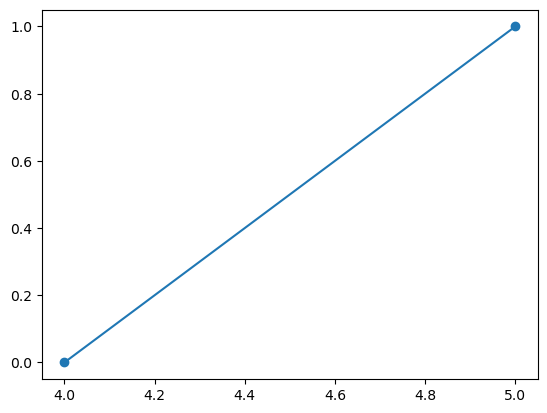

In [62]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()
